## Это 4 лаба по питону.

In [1]:
import cv2
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

1-2. Формируем DataFrame:

In [18]:
df = pd.read_csv('dataset.csv', sep = ' ')
df = df.rename(columns={'Absolute_way': 'absolute_way'})
df = df.rename(columns={'Class': 'class_img'})
df

,absolute_way,class_img
0,E:\dataset/polarbears/0000.jpg,polarbears
1,E:\dataset/polarbears/0001.jpg,polarbears
2,E:\dataset/polarbears/0002.jpg,polarbears
3,E:\dataset/polarbears/0003.jpg,polarbears
4,E:\dataset/polarbears/0004.jpg,polarbears
...,...,...
2095,E:\dataset/brownbears/1045.jpg,brownbears
2096,E:\dataset/brownbears/1046.jpg,brownbears
2097,E:\dataset/brownbears/1047.jpg,brownbears
2098,E:\dataset/brownbears/1048.jpg,brownbears


3. Формируем столбец-метку:

In [19]:
list1 = [0 for item in df.class_img if item == 'polarbears'] 
list2 = [1 for item in df.class_img if item == 'brownbears'] 
res = list1 + list2
df['mark'] = res
df

,absolute_way,class_img,mark
0,E:\dataset/polarbears/0000.jpg,polarbears,0
1,E:\dataset/polarbears/0001.jpg,polarbears,0
2,E:\dataset/polarbears/0002.jpg,polarbears,0
3,E:\dataset/polarbears/0003.jpg,polarbears,0
4,E:\dataset/polarbears/0004.jpg,polarbears,0
...,...,...,...
2095,E:\dataset/brownbears/1045.jpg,brownbears,1
2096,E:\dataset/brownbears/1046.jpg,brownbears,1
2097,E:\dataset/brownbears/1047.jpg,brownbears,1
2098,E:\dataset/brownbears/1048.jpg,brownbears,1


4. Добавляем три новых столбца: 

In [21]:
height = []
width = []
depth = []

for image in df.absolute_way:
    img = cv2.imread(image)
    heig, wid, dep = img.shape
    height.append(heig)
    width.append(wid)
    depth.append(dep)
    
df['height'] = height
df['width'] =  width
df['depth'] = depth
df

,absolute_way,class_img,mark,height,width,depth
0,E:\dataset/polarbears/0000.jpg,polarbears,0,320,458,3
1,E:\dataset/polarbears/0001.jpg,polarbears,0,270,480,3
2,E:\dataset/polarbears/0002.jpg,polarbears,0,300,480,3
3,E:\dataset/polarbears/0003.jpg,polarbears,0,320,427,3
4,E:\dataset/polarbears/0004.jpg,polarbears,0,320,480,3
...,...,...,...,...,...,...
2095,E:\dataset/brownbears/1045.jpg,brownbears,1,320,480,3
2096,E:\dataset/brownbears/1046.jpg,brownbears,1,320,480,3
2097,E:\dataset/brownbears/1047.jpg,brownbears,1,320,446,3
2098,E:\dataset/brownbears/1048.jpg,brownbears,1,320,480,3


5. Вычисление статистической информации

In [22]:
df.describe()

,mark,height,width,depth
count,2100.000000,2100.000000,2100.000000,2100.0
mean,0.500000,310.786667,442.373333,3.0
std,0.500119,17.058574,72.636549,0.0
min,0.000000,219.000000,148.000000,3.0
25%,0.000000,304.000000,427.000000,3.0
50%,0.500000,320.000000,480.000000,3.0
75%,1.000000,320.000000,480.000000,3.0
max,1.000000,320.000000,480.000000,3.0


6. Фильтрация по метке:

In [23]:
def filter_by_mark(df: pd.core.frame.DataFrame, mark: int) -> pd.core.frame.DataFrame:
    '''
    Создание нового датафрейма, отфильтрованного по метке
    Ключевые аргуметы:
        df(pd.core.frame.DataFrame): исходный датафрейм
        mark(int): метка
    '''
    return df[df.mark == mark]

filtered_df = filter_by_mark(df, 1)
filtered_df

,absolute_way,class_img,mark,height,width,depth
1050,E:\dataset/brownbears/0000.jpg,brownbears,1,320,480,3
1051,E:\dataset/brownbears/0001.jpg,brownbears,1,320,460,3
1052,E:\dataset/brownbears/0002.jpg,brownbears,1,270,480,3
1053,E:\dataset/brownbears/0003.jpg,brownbears,1,320,480,3
1054,E:\dataset/brownbears/0004.jpg,brownbears,1,300,480,3
...,...,...,...,...,...,...
2095,E:\dataset/brownbears/1045.jpg,brownbears,1,320,480,3
2096,E:\dataset/brownbears/1046.jpg,brownbears,1,320,480,3
2097,E:\dataset/brownbears/1047.jpg,brownbears,1,320,446,3
2098,E:\dataset/brownbears/1048.jpg,brownbears,1,320,480,3


7. Фильтрация по метке и размерам:

In [24]:
def filter_by_shape(df: pd.core.frame.DataFrame, mark: int, max_height: int, max_width: int) -> pd.core.frame.DataFrame:
    '''
    Создаёт новый датафрейм, отфильтрованный по метке и размерам
    Ключевые аргументы:
        df(pd.core.frame.DataFrame): исходный датафрейм
        mark(int): метка
        max_height(int): максимальный предел фильтрации по высоте
        max_width(int): максимальный предел фильтрации по ширине
    '''
    return df[(df.mark == mark) & (df.height <= max_height) & (df.width <= max_width)]

filtered_df2 = filter_by_shape(df, 1, 320, 450)
filtered_df2

,absolute_way,class_img,mark,height,width,depth
1056,E:\dataset/brownbears/0006.jpg,brownbears,1,320,448,3
1068,E:\dataset/brownbears/0018.jpg,brownbears,1,320,400,3
1071,E:\dataset/brownbears/0021.jpg,brownbears,1,320,427,3
1072,E:\dataset/brownbears/0022.jpg,brownbears,1,320,427,3
1076,E:\dataset/brownbears/0026.jpg,brownbears,1,320,240,3
...,...,...,...,...,...,...
2083,E:\dataset/brownbears/1033.jpg,brownbears,1,320,180,3
2084,E:\dataset/brownbears/1034.jpg,brownbears,1,320,427,3
2087,E:\dataset/brownbears/1037.jpg,brownbears,1,320,213,3
2094,E:\dataset/brownbears/1044.jpg,brownbears,1,320,370,3


8. Группировка датафрейма:

In [25]:
df['size'] = df['height'] * df['width']
def grouping_df(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    '''
    Группировка датафрейма по метке класса с вычислением максимального, минимального и среднего значения по количеству пикселей
    Ключевые аргументы:
        df(pd.core.frame.DataFrame): исходный датафрейм 
    '''
    rdf = df.loc[:, ['mark', 'size']]
    res_df = rdf.groupby('mark').count()
    res_df['min_size'] = rdf['size'].min()
    res_df['min_size'][0] = rdf[rdf.mark == 0]['size'].min()
    res_df['min_size'][1] = rdf[rdf.mark == 1]['size'].min()
    res_df['average_size'] = rdf['size'].mean()
    res_df['average_size'][0] = rdf[rdf.mark == 0]['size'].mean()
    res_df['average_size'][1] = rdf[rdf.mark == 1]['size'].mean()
    res_df['max_size'] = rdf['size'].max()
    res_df['max_size'][0] = rdf[rdf.mark == 0]['size'].max()
    res_df['max_size'][1] = rdf[rdf.mark == 1]['size'].max()
    res_df.drop(['size'], axis=1, inplace=True)
    return res_df

gr_df = grouping_df(df) 
gr_df


,min_size,average_size,max_size
mark,,,
0,47360,137399.619048,153600
1,51200,136874.514286,153600


9. Построение гистограммы:

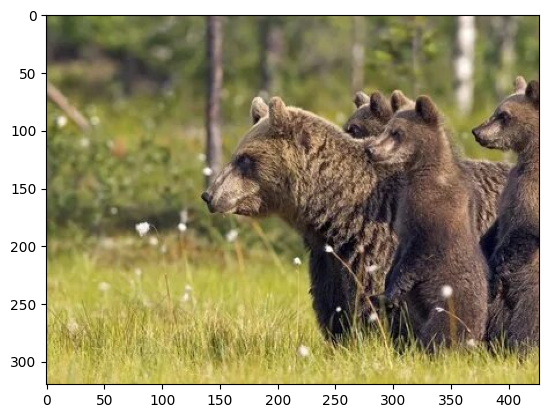

In [47]:
def hist(df: pd.core.frame.DataFrame, mark: int) -> np.ndarray[int, np.dtype[np.generic]]:
    '''
    Строит гистограмму для случайного изображения из датафрейма с меткой mark
    Ключевые агрументы:
        df(pd.core.frame.DataFrame): исходный датафрейм
        mark(int): метка класса
    '''
    random_numbers = list(range(0, 1050))
    random.shuffle(random_numbers)
    num = random.choice(random_numbers)
    n_df = df[df.mark == mark]['absolute_way']
    img_path = n_df.iloc[num]
    image = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    blue = []
    green = []
    red = []
    colors = (blue, green, red)
    for i in range(len(colors)):
        histg = cv2.calcHist([image], [i], None, [256], [0,256])
        if (i == 0): 
            blue = histg
        if (i == 1): 
            green = histg
        if (i == 2): 
            red = histg
    return blue, green, red

bl, gr, rd = hist(df, 1)


10. Отображение гистограммы:

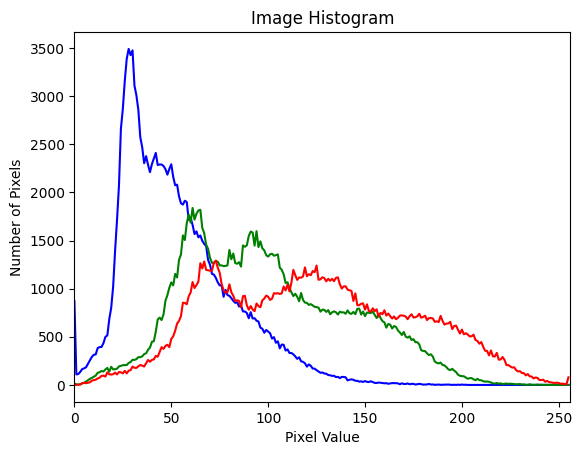

In [46]:
colors = {'b': bl, 'g': gr, 'r': rd}
color = ('b', 'g', 'r')

for i, col in enumerate(color):
    plt.plot(colors[col], color=col)
    plt.xlim([0,256])
plt.title('Image Histogram')
plt.ylabel('Number of Pixels')
plt.xlabel('Pixel Value')
plt.show()
